- Importing the File
- Importing the Data Description to get the matabolism position and names. 
- Zooming to the metabolism position and find the peaks there, for every measurement step
- Plotting the Peaks and make interpolation
- Plotly configureation: manually set range

## Classes

In [68]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import polars as pl 

# script classes
from classes import *


In [69]:
loaddata = LoadData()

peakfinder = PeakFinder()


In [70]:
# FA_20240517_2H_yeast_Nicotinamide-d4 _9.csv

file = str(Path('FA_20240406_2H_Gluc-d2_50mM+Pyruvate_400mM_5.ser.csv'))
substrates = loaddata.get_substrate_list(file)
metabolites = loaddata.get_metabolite_list(file)
df_list = loaddata.load_data(file)

# geht nicht
# FA__20240205_2H_yeast_Acetone-d6_3.csv

Here are the x positions we have to look for peaks!

In [71]:
substrates, metabolites

([3.8, np.float64(4.7)], [1.27, 1.86, 2.32, 1.42])

Zooming to the substrat and metabolism positions

In [72]:
df = pd.read_csv(df_list[0])
display(df.head())


def zoom(df, pos, width=0.5):

    start = pos - width
    end = pos + width
    df_zoom = df[(df.iloc[:, 0] >= start) & (df.iloc[:, 0] <= end)]
    return df_zoom
    
def get_peak_list(df, substrat, range=0.1):
    
    peak_list = []
    peak_df = pd.DataFrame()
    df_zoom = zoom(df, substrat, range).reset_index(drop=True)

    for col in df.columns[1:]:

        x = df_zoom.iloc[:, 0]
        y = df_zoom.loc[:, col]

        peaks, prob, tresh = peakfinder.peaks_finder(y)

        peaks = {'x': x[peaks].values, 
                'y': y[peaks].values}

        peak_df = pd.concat([peak_df, pd.DataFrame(peaks)], ignore_index=True)
        
    return peak_df

    

,2H chemical shift (ppm),FA_20240406_2H_yeast_1.5.ser#1,FA_20240406_2H_yeast_1.5.ser#2,FA_20240406_2H_yeast_1.5.ser#3,FA_20240406_2H_yeast_1.5.ser#4,FA_20240406_2H_yeast_1.5.ser#5,FA_20240406_2H_yeast_1.5.ser#6,FA_20240406_2H_yeast_1.5.ser#7,FA_20240406_2H_yeast_1.5.ser#8,FA_20240406_2H_yeast_1.5.ser#9,...,FA_20240406_2H_yeast_1.5.ser#226,FA_20240406_2H_yeast_1.5.ser#227,FA_20240406_2H_yeast_1.5.ser#228,FA_20240406_2H_yeast_1.5.ser#229,FA_20240406_2H_yeast_1.5.ser#230,FA_20240406_2H_yeast_1.5.ser#231,FA_20240406_2H_yeast_1.5.ser#232,FA_20240406_2H_yeast_1.5.ser#233,FA_20240406_2H_yeast_1.5.ser#234,FA_20240406_2H_yeast_1.5.ser#235
0,0.708894,-170.0210,1322.800,-370.90900,333.6110,-276.9690,-269.2800,-156.625,143.838,108.301,...,-110.9770,176.544,1084.730,413.1400,915.440,805.986,692.662,142.767,393.7370,786.582
1,0.717039,-122.3220,1135.760,-248.78200,15.0896,-126.6630,-281.0990,111.704,210.840,200.999,...,-143.9820,545.962,957.074,320.8270,903.934,620.241,524.602,144.264,319.4130,831.183
2,0.725184,-29.5932,907.319,-150.02100,-309.3730,81.5514,-239.2410,380.799,243.121,218.840,...,-90.1220,688.114,899.475,222.9920,780.060,492.174,604.572,168.146,115.3710,668.283
3,0.733329,21.7164,793.837,-13.22190,-466.5300,96.2981,-135.7950,586.729,288.644,179.679,...,-24.9720,556.761,993.014,105.0350,656.735,459.198,840.331,217.127,-15.0218,441.339
4,0.741474,86.2692,720.480,1.49927,-471.3660,-155.9580,-20.8895,695.834,224.594,115.634,...,-11.4072,429.727,1065.720,-23.6793,644.500,332.833,1002.400,260.930,-43.0991,255.098


In [73]:
import plotly.express as px
import polars as pl
import numpy as np

def plot_picture(df, substrates, metabolites):
    pic = df.iloc[:, 1:].to_numpy()
    pic = np.transpose(pic)
    
    # flip the picture upside down
    pic = np.flipud(pic)

    # Extract x-axis labels from the first column of the DataFrame
    x_labels = df.iloc[:, 0].to_numpy()

    # extract y-axis labels from the column names of the DataFrame
    y_labels = df.iloc[:, 1:].columns 
    
    # reorder the y-axis labels last to first
    y_labels = y_labels[::-1]


    # Create the heatmap with the specified x-axis labels
    fig = px.imshow(
        pic,
        aspect='auto',
        labels=dict(x="Spectrum", y="Time", color="Intensity"),
        x=x_labels,  # Set the x-axis labels
        y=y_labels,  # Set the y-axis labels 
        # color
        color_continuous_scale='Spectral_r',
    )

    fig.show()

# Assuming df, substrates, and metabolites are defined
plot_picture(df, substrates=substrates, metabolites=metabolites)


## Plot Metabolite 

metabolites: 1.27


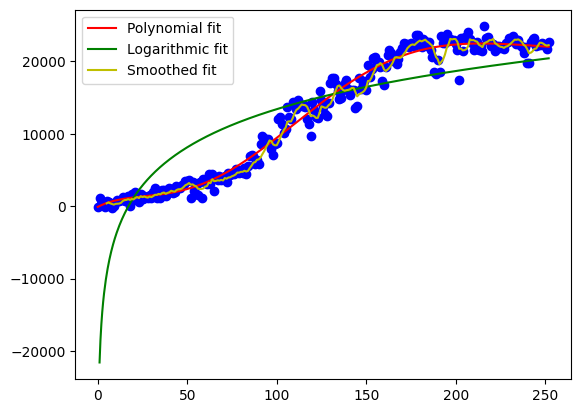

metabolites: 1.86


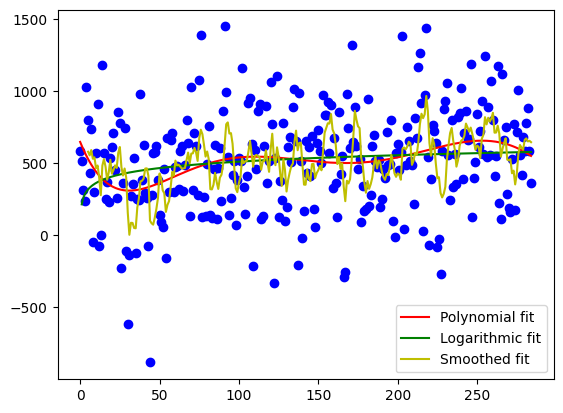

metabolites: 2.32


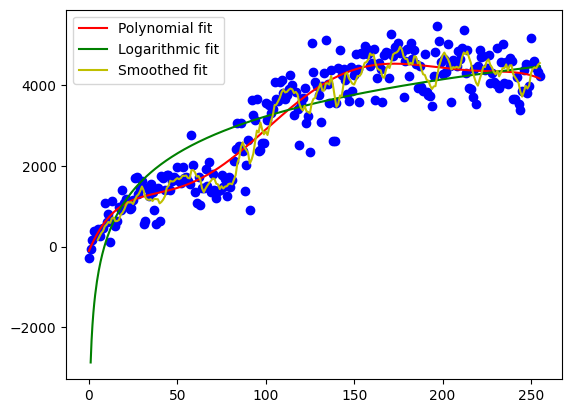

metabolites: 1.42


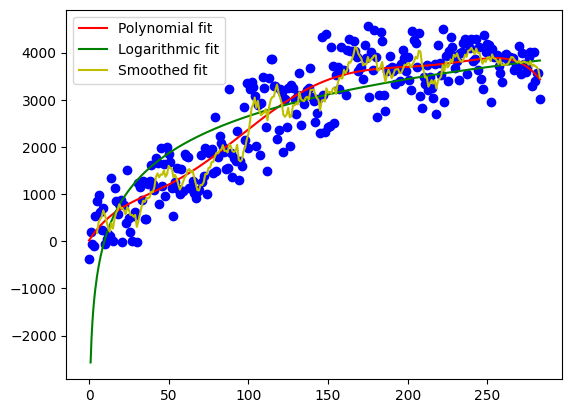

In [74]:
def outlier_detection(x, y, threshold=2):
    Q1 = np.percentile(y, 25)
    Q3 = np.percentile(y, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    mask = (y >= lower_bound) & (y <= upper_bound)
    return x[mask], y[mask]


# Polynomial Regression
def polynomial_regression(x, y, degree=16):
    coefficients = np.polyfit(x, y, degree)
    polynomial = np.poly1d(coefficients)
    x_new = np.linspace(x.min(), x.max(), 500)
    y_regression = polynomial(x_new)


    

    return x_new, y_regression

# Logarithmic Regression
def logarithmic_regression(x, y):
    # Filter out non-positive x values
    valid_indices = x > 0  # Only keep positive x values for the log transformation
    x = x[valid_indices]
    y = y[valid_indices]
    x_new = np.linspace(x.min(), x.max(), 500)
    # Apply logarithmic transformation to x for the logarithmic regression
    log_x = np.log(x)
    # Fit a linear model to log(x) vs y
    coefficients = np.polyfit(log_x, y, 1)  # Degree 1 for a linear fit in log space
    logarithmic_fit = np.poly1d(coefficients)
    y_log = logarithmic_fit(np.log(x_new))



    return x_new, y_log

def window_smooth(x, y, window_size=6):
    
    # rolling window
    y_smooth = y.rolling(window_size).mean()
    x_new = x

    return x_new, y_smooth





for metabolite in range(len(metabolites)):
    metabolite_peak =get_peak_list(df, substrat=metabolites[metabolite], range=0.05).dropna()
    print(f'metabolites: {metabolites[metabolite]}')

    # Define the data points
    x = metabolite_peak.index
    y = metabolite_peak['y']

    # Remove outliers
    #x, y = outlier_detection(x, y)

    x_poly, y_poly = polynomial_regression(x, y, degree=6)
    x_log, y_log = logarithmic_regression(x, y)
    x_smooth, y_smooth = window_smooth(x, y)

    # Plot the original data points and the regression line
    plt.plot(x, y, 'bo')           # Original data points
    plt.plot(x_poly, y_poly, 'r-', label=f'Polynomial fit')  # Regression line
    plt.plot(x_log, y_log, 'g-', label='Logarithmic fit')  # Regression line in original space
    plt.plot(x_smooth, y_smooth, 'y-', label='Smoothed fit')  # Regression line in original space
    plt.legend()
    plt.show()


substrate: 3.8


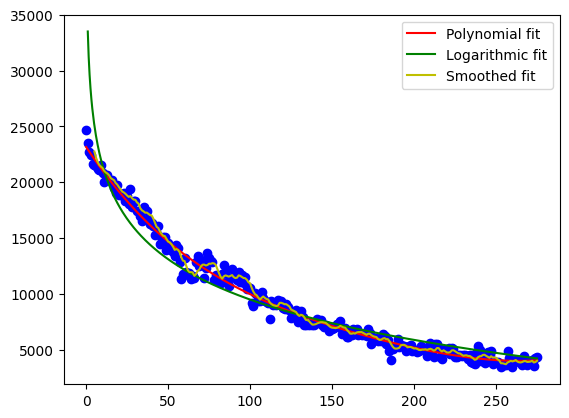

substrate: 4.7


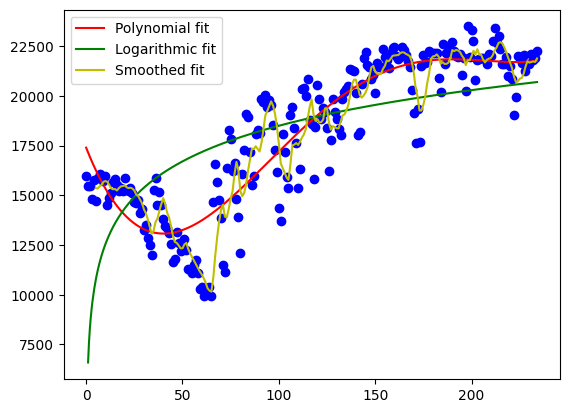

In [76]:
#peak_df = get_peak_list(df, substrat=substrates[1], range=0.1).dropna()

for substrate in range(len(substrates)):
    substrate_peak =get_peak_list(df, substrat=substrates[substrate], range=0.05).dropna()
    print(f'substrate: {substrates[substrate]}')

    # Define the data points
    x = substrate_peak.index
    y = substrate_peak['y']

    # Remove outliers
    x, y = outlier_detection(x, y)

    x_poly, y_poly = polynomial_regression(x, y, degree=4)
    x_log, y_log = logarithmic_regression(x, y)
    x_smooth, y_smooth = window_smooth(x, y)

    # Plot the original data points and the regression line
    plt.plot(x, y, 'bo')           # Original data points
    plt.plot(x_poly, y_poly, 'r-', label=f'Polynomial fit')  # Regression line
    plt.plot(x_log, y_log, 'g-', label='Logarithmic fit')  # Regression line in original space
    plt.plot(x_smooth, y_smooth, 'y-', label='Smoothed fit')  # Regression line in original space
    plt.legend()
    plt.show()